In [3]:
import torch
import torchvision
import numpy as np
from torch.autograd import Variable
from torch import nn 
from torch import optim
import torch.nn.functional as F
import torchvision.transforms as transforms

In [2]:
import matplotlib.pyplot as plt 

Добиться вразумительного результата от модели, собранной на занятии (7 угаданныx картинок из 10 предложенных на семинаре). Варианты изменений:
  * изменение слоёв и их количества;
  * изменение метода оптимизации; 
  * изменение процесса обучения; 
  * для продвинутых: преобразование данных transform

In [4]:
def print_tens_info(tensor):
    print("X :\n%s\n" % tensor)
    print("X количество измерений:\n%s\n" % tensor.dim())
    print("X размеры : ",  tensor.size())
    print("X тип : %s\n" % (tensor.type()))

In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
train_dataset = torchvision.datasets.CIFAR10(root='C:/Users/vitto/Documents/Новая папка/Фреймворк PyTorch',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (classes[label])

100.0%

Extracting C:/Users/vitto/Documents/Новая папка/Фреймворк PyTorch\cifar-10-python.tar.gz to C:/Users/vitto/Documents/Новая папка/Фреймворк PyTorch
torch.Size([3, 32, 32])
frog


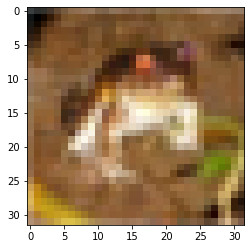

In [8]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [13]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10,
                                         shuffle=False)

Files already downloaded and verified


In [17]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 5, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 5, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 5, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 5, padding=1)
        self.pool2 = nn.MaxPool2d((2, 2), stride=1)
        self.fc1 = nn.Linear(64 * 9 * 9, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = F.relu(self.conv3(x))
        x = self.pool2(F.relu(self.conv4(x)))        
        x = self.dropout(x)
        x = x.view(-1, 64 * 9 * 9)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


net = Net().to('cpu')

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [19]:
for epoch in range(15):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:   
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001
[1,   301] loss: 0.345
[1,   601] loss: 0.345
[2,     1] loss: 0.001
[2,   301] loss: 0.345
[2,   601] loss: 0.342
[3,     1] loss: 0.001
[3,   301] loss: 0.328
[3,   601] loss: 0.317
[4,     1] loss: 0.001
[4,   301] loss: 0.295
[4,   601] loss: 0.287
[5,     1] loss: 0.001
[5,   301] loss: 0.268
[5,   601] loss: 0.260
[6,     1] loss: 0.001
[6,   301] loss: 0.249
[6,   601] loss: 0.246
[7,     1] loss: 0.001
[7,   301] loss: 0.237
[7,   601] loss: 0.233
[8,     1] loss: 0.001
[8,   301] loss: 0.228
[8,   601] loss: 0.222
[9,     1] loss: 0.001
[9,   301] loss: 0.218
[9,   601] loss: 0.215
[10,     1] loss: 0.001
[10,   301] loss: 0.210
[10,   601] loss: 0.208
[11,     1] loss: 0.001
[11,   301] loss: 0.202
[11,   601] loss: 0.202
[12,     1] loss: 0.001
[12,   301] loss: 0.194
[12,   601] loss: 0.196
[13,     1] loss: 0.000
[13,   301] loss: 0.189
[13,   601] loss: 0.185
[14,     1] loss: 0.001
[14,   301] loss: 0.182
[14,   601] loss: 0.179
[15,     1] loss: 0

In [20]:
PATH = './cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

In [21]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param," \ ", net.state_dict()[param].size())

Model state_dict: 
conv1.weight  \  torch.Size([32, 3, 5, 5])
conv1.bias  \  torch.Size([32])
conv2.weight  \  torch.Size([32, 32, 5, 5])
conv2.bias  \  torch.Size([32])
conv3.weight  \  torch.Size([64, 32, 5, 5])
conv3.bias  \  torch.Size([64])
conv4.weight  \  torch.Size([64, 64, 5, 5])
conv4.bias  \  torch.Size([64])
fc1.weight  \  torch.Size([256, 5184])
fc1.bias  \  torch.Size([256])
fc2.weight  \  torch.Size([256, 256])
fc2.bias  \  torch.Size([256])
fc3.weight  \  torch.Size([10, 256])
fc3.bias  \  torch.Size([10])


In [22]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [23]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car


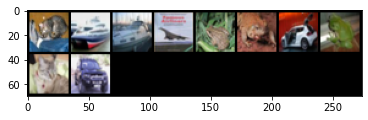

In [25]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))

In [26]:
print(outputs)

tensor([[-0.8448, -1.9874,  1.2074,  3.1326,  0.8470,  2.4173, -1.0520,  0.5182,
         -0.4844, -2.7746],
        [ 6.1800,  8.1433, -1.0417, -3.6420, -3.9132, -6.1327, -5.6600, -5.2411,
          6.4650,  4.7140],
        [ 2.5884,  2.7432, -1.3375, -1.3997, -1.1899, -2.4258, -2.6206, -2.2295,
          4.2675,  1.8633],
        [ 3.0822,  2.4107,  0.4286, -1.3992, -1.9549, -3.6545, -2.0799, -2.6851,
          4.2094,  1.5396],
        [-2.8436, -4.6866,  1.9381,  2.7199,  4.1478,  2.1610,  4.5939, -0.6196,
         -2.6098, -4.3545],
        [-0.8023, -3.3719,  1.4020,  2.3226,  1.4085,  1.6789,  1.7082, -0.2297,
         -1.8531, -2.5693],
        [-0.0424,  3.9084,  0.0846,  1.0402, -2.1170, -0.6663, -0.2987, -2.4752,
         -0.8836,  2.4786],
        [-0.3492, -1.8902,  1.8957,  0.5728,  2.2235, -0.7100,  2.6870, -1.0896,
         -1.8037, -1.8649],
        [-1.1196, -3.9823,  2.2582,  3.0389,  1.6653,  3.8263, -0.1800,  0.8349,
         -3.3818, -3.4927],
        [ 0.8656,  

In [28]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(10)))

Predicted:    cat   car  ship  ship  frog   cat   car  frog   dog   car


Получилось 6 из 10, с другими архитектурами получалось либо сравнимо, а исполнялось дольше. Или заметно хуже

Переписать данный туториал на pytorch: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru

In [29]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(28 * 28, 128)
        self.dropout = nn.Dropout(.2)
        self.lin2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.lin1(x))
        x = self.dropout(x)
        x = F.softmax(self.lin2(x), dim=1)
        return x


net = Net()

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

In [31]:
inputs = Variable(torch.randn(100, 28, 28), requires_grad = True)
labels = Variable(torch.randint(0, 10, (100,)), requires_grad = False)

In [32]:
inputs.shape, labels.shape

(torch.Size([100, 28, 28]), torch.Size([100]))

In [ ]:
for epoch in range(10):
    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    print('[epoch %d] loss: %.3f' % (epoch + 1, loss))